In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import pandas as pd
data = pd.read_csv("datamerge.csv")

def pandasStringSeriesToNumpy(col, size):
    addressData = np.zeros((col.shape[0], size))
    for i, row in data.iterrows():
       word =  row['addr_street']
       padSize = size - len(word)
       wordVec =  list(map(lambda x: ord(x), word)) + [32] * padSize
       addressData[i,:] = wordVec 
    return addressData

addressData = pandasStringSeriesToNumpy(data.addr_street, 31)


x_vals = addressData[:,0:31]
y_vals = addressData[:,0:31]
sess = tf.Session()



/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

train_indices = np.random.choice(len(x_vals),int( round(len(x_vals)*0.8)), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# CONFIG NETWORK
INPUT_SIZE = 31
OUTPUT_SIZE = 31
hidden_layer_nodes = 1



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


In [3]:
batch_size = 200
x_data = tf.placeholder(shape=[None, INPUT_SIZE], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, OUTPUT_SIZE], dtype=tf.float32)

A1 = tf.Variable(tf.random_normal(shape=[INPUT_SIZE,hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, OUTPUT_SIZE]))
b2 = tf.Variable(tf.random_normal(shape=[OUTPUT_SIZE]))

hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2),b2))

loss = tf.reduce_mean(tf.square(y_target - final_output))

my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Generation: 10. Loss = 38.32069
Generation: 20. Loss = 30.090939
Generation: 30. Loss = 29.936558
Generation: 40. Loss = 30.013521
Generation: 50. Loss = 29.85814


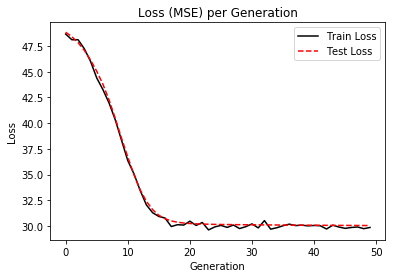

In [4]:
sess.run(init)
# First we initialize the loss vectors for storage.
loss_vec = []
test_loss = []
for i in range(50):
    # First we select a random set of indices for the batch.
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    # We then select the training values
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    
    # Now we run the training step
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    # We save the training loss
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))

    # Finally, we run the test-set loss and save it.
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%10==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(np.sqrt(temp_loss)))

plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()        
        
sess.close()